# Playing with Runge-Kutta methods ##

In [1]:
from RKformula import *
from RKplot import *
from RKcolloc import *
from RKplot import *

Let us import somme predeined Runge-Kutta method descriptions:

In [2]:
load("lobatto4.sage","radau5.sage","sdirk3.sage","gauss4.sage","radau2a.sage","rk4.sage","sdirk5.sage")

Choose one formula:

In [3]:
#RK=Radau5
RK=Lobatto4
#RK=SDIRK3
#RK=Gauss4
#RK=Radau2a
#RK=RK4
#RK=SDIRK5

In [4]:
print RK.title

Lobatto method, order 4


and define the formula:

In [5]:
F=RKformula(RK.A,RK.B)

Ok, now let-us check different properties of the formula:

In [6]:
F.is_explicit

False

In [7]:
F.is_A_stable

False

In [8]:
F.is_L_stable

False

In [9]:
F.is_stiffly_accurate

False

In [10]:
F.is_algebraically_stable

False

In [11]:
F.conserve_quadratic_invariants

False

In [12]:
%display latex
F.stability_function

(1/24*z^3 + 1/4*z^2 + 3/4*z + 1)/(-1/4*z + 1)

In [13]:
F.poles_of_stability_function

[(4, 1)]

Find the limit of the stability domain on $\mathbb{R}^-$. It can be $-\infty$, for example if the method is A-stable:

In [14]:
F.stability_on_real_negative_axis

-5.419951893353394?

In [15]:
F.order_of_stability_function

4

In [16]:
F.order

4

Now, let-us draw the limite of the stability domain:

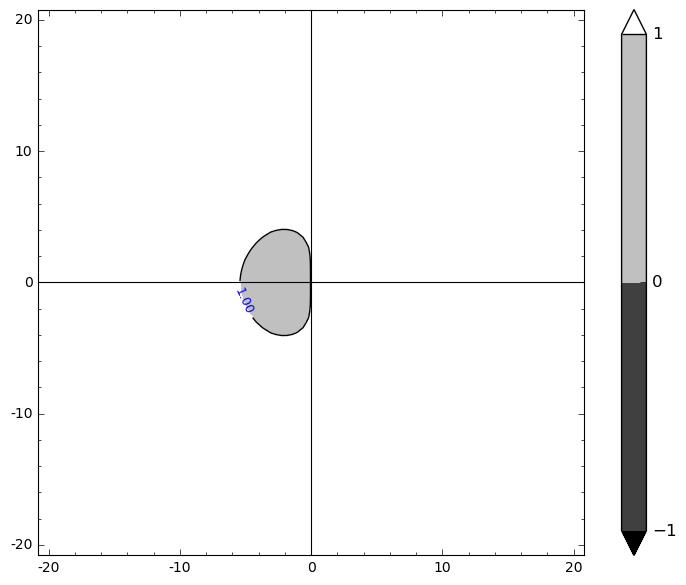

In [17]:
p=RKplot(F,fill=True,ncurves=2,Enlarge=5)
p.show()

We can also draw the order star:

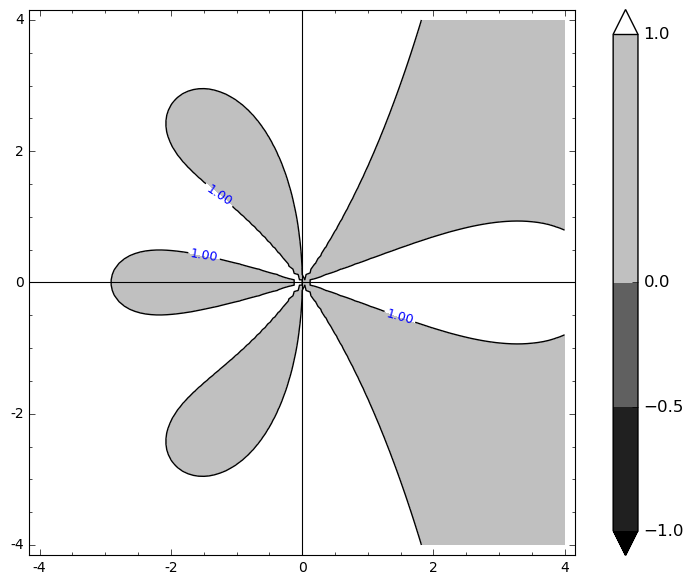

In [18]:
p=RKplot(F,fill=True,ncurves=1,type="star",Enlarge=1)
#p=RKplot(F,fill=False,ncurves=1,type="star",limits=[(-7.5,+15),(-10,10)])

p.show()

In [19]:
var("y")
var("x")
f=lambda x,y: F.order_star_function(x=x,y=y)-1

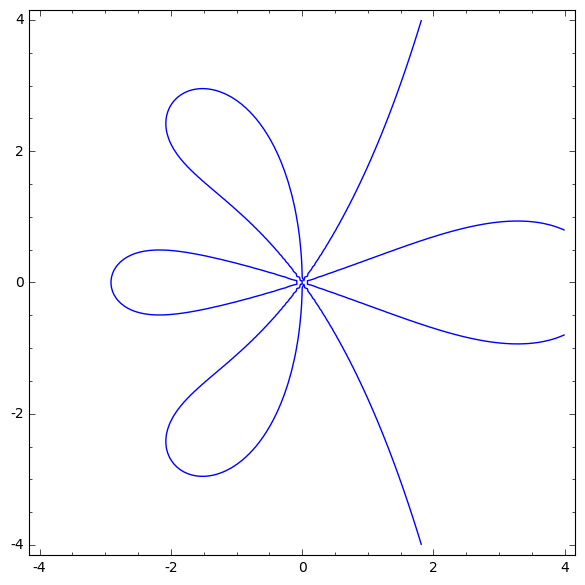

In [20]:
implicit_plot(f,(x,-4,4),(y,-4,4))